<a href="https://colab.research.google.com/github/zahrabashir98/Financial-Indicators/blob/master/fft_of_closes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Using FFT to Find the Dominant Frequencies in the Close Signal


In [87]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
from scipy.fft import fft, ifft
import seaborn as sns
path = 'drive/My Drive/SharedFolder/BINANCE_BTCUSDT, 480.csv'
# datafile = "BINANCE_BTCUSDT, 480.csv"
data = pd.read_csv(path)

close = data['close']

close.index = pd.to_datetime(close.index)
close_np = close.to_numpy(dtype=None, copy=False)
close_fft = fft(close_np)

(3300,)
(array([ 113, 3187]),)
1977.9929246307263
4628.244645473446
3634.5115883801604
3994.4622303049273


Text(0.5, 1.0, 'Axis [1,1]')

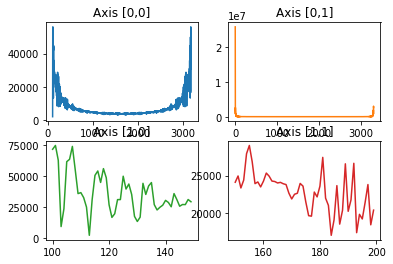

In [139]:
data = pd.read_csv(path)
new_data = data['close']

moving_average = new_data.rolling(window=20).mean()

remove_nan = moving_average.dropna()

MA_fft = abs(fft(pd.Series.to_numpy(remove_nan)))
print(MA_fft.shape)
MA_fft_1 = np.sort(MA_fft, axis=0)
MA_fft_1 = abs(MA_fft_1)
result = np. where(MA_fft == 1977.9929246307263)
print(result)
# print(MA_fft_1[0])
y = [i for i in range(len(MA_fft))]
fig, axs = plt.subplots(2, 2)
axs[0, 0].plot(y[113:3187], MA_fft[113:3187])
axs[0, 0].set_title('Axis [0,0]')
print(MA_fft[1000])
print(MA_fft[2074])
print(MA_fft[1528])
axs[0, 1].plot(y, MA_fft, 'tab:orange')
axs[0, 1].set_title('Axis [0,1]')
axs[1, 0].plot(y[100:150], MA_fft[100:150], 'tab:green')
axs[1, 0].set_title('Axis [1,0]')
axs[1, 1].plot(y[150:200], MA_fft[150:200], 'tab:red')
axs[1, 1].set_title('Axis [1,1]')

In [81]:
def calculate_mean_of_group(num, unit, fft_array):
  for i in range(num):
    if i == num-1:
      tmp_mean = fft_array[i*unit:len(fft_array)].mean()

    else:
      tmp_mean = fft_array[i*unit:(i+1)*unit].mean()
    print(tmp_mean)
    tmp_array.append(tmp_mean)
  print("\n\n")
  print(np.var(tmp_array))

##### Finding abs of complex numbers ans subtracting the mean value from them (easier to work with)

In [ ]:
tmp_array = []

abs_close = []
for data in close_fft:
  abs_close.append((abs(data)))
abs_close = np.array(abs_close)
close_mean = abs_close.mean()

abs_close -= close_mean
# print(abs_close)
num = 300
print(len(abs_close))
print(int(len(abs_close)/num))
calculate_mean_of_group(num, int(len(abs_close)/num), abs_close)


##### Visualization

[25812576.02167165  2561428.16094422  2970953.76237583 ...
   825999.40907699  2970953.76237583  2561428.16094422]


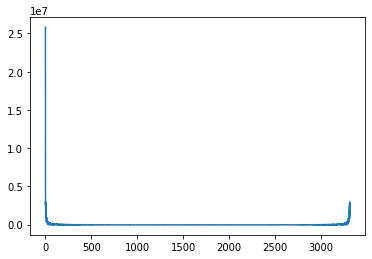

In [4]:
print(abs_close)
plt.plot(abs_close)
plt.show()

[25812576.02167165  2561428.16094422  2970953.76237583 ...
   825999.40907699  2970953.76237583  2561428.16094422]


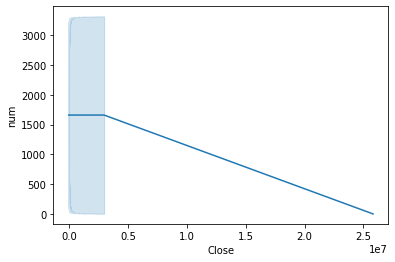

In [ ]:
print(abs_close)
a =[i for i in range(len(abs_close))]

data = {'num':[i for i in range(len(abs_close))], 'Close': abs_close}
df = pd.DataFrame(data)
# ax = sns.jointplot(x="Close", y="num", data=df)
b = sns.lineplot(x="Close", y="num", data=df)

In [ ]:
print("Top Ten Values:")
a = np.sort(abs_close)
print(a[-10:])
print("\n")
print("Top Ten Indexes:")
b = abs_close.argsort()[-10:][::]
print(b)

Top Ten Values:
[ 1586244.93312548  1968579.87272997  1968579.87272997  2561428.16094422
  2561428.16094422  2624204.32740535  2624204.32740535  2970953.76237583
  2970953.76237583 25812576.02167165]


Top Ten Indexes:
[3309 3310 3311 3312 3313 3314 3315 3317 3316 3318]
